### Image Recognition Project


In [1]:
#Importing libraries
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
img = cv2.imread('Test_images/3788.jpg')
img.shape

(233, 247, 3)

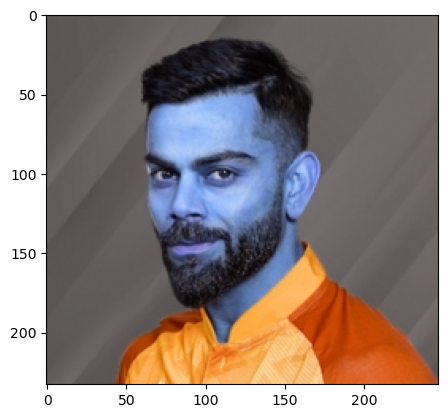

In [4]:
plt.imshow(img)

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(233, 247)

In [6]:
gray

array([[ 86,  86,  86, ..., 106, 108, 105],
       [ 86,  86,  86, ..., 107, 106, 106],
       [ 87,  86,  86, ..., 107, 108, 107],
       ...,
       [ 92,  93,  94, ...,  78,  85,  86],
       [ 93,  92,  94, ...,  77,  79,  85],
       [ 93,  93,  93, ...,  77,  76,  83]], dtype=uint8)

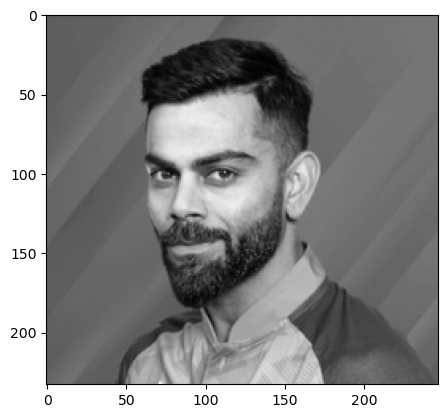

In [7]:
plt.imshow(gray, cmap='gray')

In [9]:
face_cascade = cv2.CascadeClassifier('OpenCV/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('OpenCV/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces



array([[ 40,  61, 104, 104]])

In [10]:
(x,y,w,h) = faces[0]
x,y,w,h

(40, 61, 104, 104)

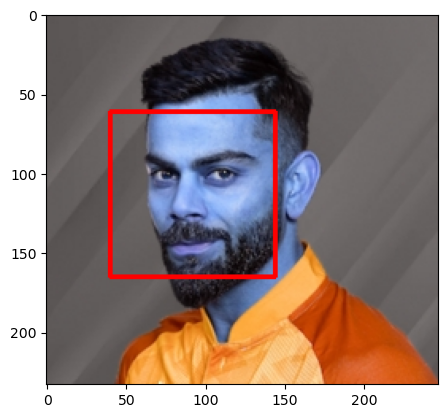

In [11]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

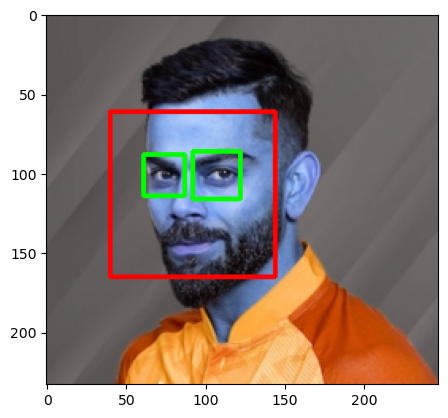

In [12]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

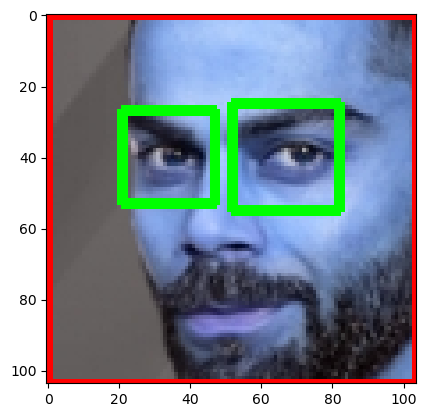

In [13]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [26]:
def get_cropped_image_if_2_eyes(image_path):
    if type(image_path) != str:
        image_path = str(image_path)
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

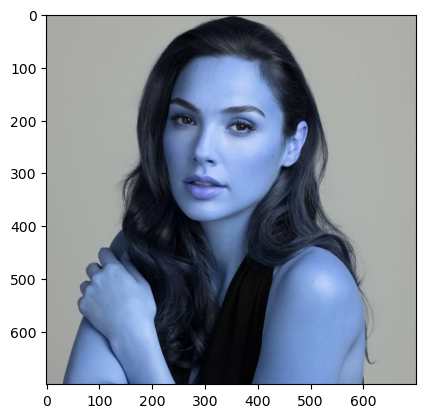

In [27]:
original_image = cv2.imread('Test_images/Gal.jpg')
plt.imshow(original_image)

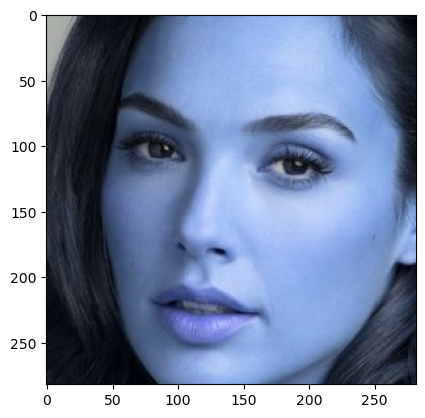

In [28]:
cropped_image = get_cropped_image_if_2_eyes('Test_images/Gal.jpg')
plt.imshow(cropped_image)

In [61]:
path_to_data = "Dataset"
path_to_cr_data = "Dataset/cropped"

In [62]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [63]:
img_dirs

['Dataset\\cropped',
 'Dataset\\Elon_Musk',
 'Dataset\\Gal_gadot',
 'Dataset\\Mr.beast',
 'Dataset\\Ronaldo',
 'Dataset\\Virat_kohli']

In [64]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [128]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)

Dataset\cropped
Dataset\Elon_Musk
Dataset\Gal_gadot
Dataset\Mr.beast
Dataset\Ronaldo
Dataset\Virat_kohli


In [81]:
import os
import cv2

def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

# Set the paths to the folders containing the images
folders = ['Dataset/Elon_Musk', 'Dataset/Gal_gadot', 'Dataset/Mr.beast', 'Dataset/Ronaldo', 'Dataset/Virat_kohli']

        
# Create a new folder named "Cropped" to save the cropped images
if not os.path.exists("Cropped"):
    os.makedirs("Cropped")

# Loop through each folder
for folder in folders:
    # Loop through each file in the folder
    for filename in os.listdir(folder):
        # Check if the file is an image file
        if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
            # Get the full path to the image file
            image_path = os.path.join(folder, filename)
            
            # Try to crop the image
            cropped_image = get_cropped_image_if_2_eyes(image_path)
            
            # If there were two eyes detected in the image, save the cropped image
            if cropped_image is not None:
                # Get the folder name from the original image path
                folder_name = os.path.basename(os.path.normpath(folder))
                
                # Create a new folder inside the "Cropped" folder with the same name as the original folder
                cropped_folder = os.path.join("Cropped", folder_name)
                if not os.path.exists(cropped_folder):
                    os.makedirs(cropped_folder)
                
                # Save the cropped image to the new folder
                cropped_image_path = os.path.join(cropped_folder, filename)
                cv2.imwrite(cropped_image_path, cropped_image)


In [136]:
import os
from PIL import Image

# Set the path to the folder containing the other folders
main_folder = 'Dataset/Cropped'

# Create an empty dictionary to hold the folder names and file names
celebrity_file_names_dict = {}

# Loop through each folder in the main folder
for folder_name in os.listdir(main_folder):
    # Check if the item in the main folder is a folder (not a file)
    if os.path.isdir(os.path.join(main_folder, folder_name)):
        # Get the path to the folder
        folder_path = os.path.join(main_folder, folder_name)
        
        # Get a list of the file names in the folder
        file_names = os.listdir(folder_path)
        
        # Add the folder name and file names to the dictionary
        celebrity_file_names_dict[folder_name] = [os.path.join(main_folder, folder_name, file_name) for file_name in file_names]

# Loop through the dictionary and save each file as an image
for folder_name, file_paths in celebrity_file_names_dict.items():
    for file_path in file_paths:
        # Open the file as an image
        image = Image.open(file_path)
        
        # Save the image with a new file name
        new_file_name = folder_name + '_' + os.path.basename(file_path)
        new_file_path = os.path.join(main_folder, new_file_name)
        image.save(new_file_path)
        
print('Images saved successfully.')


Images saved successfully.


In [137]:
print(celebrity_file_names_dict)

{'Elon_Musk': ['Dataset/Cropped\\Elon_Musk\\Elon_musk (1).jpeg', 'Dataset/Cropped\\Elon_Musk\\Elon_musk (1).jpg', 'Dataset/Cropped\\Elon_Musk\\Elon_musk (1).png', 'Dataset/Cropped\\Elon_Musk\\Elon_musk (10).jpg', 'Dataset/Cropped\\Elon_Musk\\Elon_musk (11).jpg', 'Dataset/Cropped\\Elon_Musk\\Elon_musk (12).jpg', 'Dataset/Cropped\\Elon_Musk\\Elon_musk (13).jpg', 'Dataset/Cropped\\Elon_Musk\\Elon_musk (14).jpg', 'Dataset/Cropped\\Elon_Musk\\Elon_musk (15).jpg', 'Dataset/Cropped\\Elon_Musk\\Elon_musk (16).jpg', 'Dataset/Cropped\\Elon_Musk\\Elon_musk (17).jpg', 'Dataset/Cropped\\Elon_Musk\\Elon_musk (18).jpg', 'Dataset/Cropped\\Elon_Musk\\Elon_musk (19).jpg', 'Dataset/Cropped\\Elon_Musk\\Elon_musk (2).jpeg', 'Dataset/Cropped\\Elon_Musk\\Elon_musk (2).jpg', 'Dataset/Cropped\\Elon_Musk\\Elon_musk (2).png', 'Dataset/Cropped\\Elon_Musk\\Elon_musk (20).jpg', 'Dataset/Cropped\\Elon_Musk\\Elon_musk (21).jpg', 'Dataset/Cropped\\Elon_Musk\\Elon_musk (22).jpg', 'Dataset/Cropped\\Elon_Musk\\Elon_musk 

In [138]:
#assign numbers to the celebrities name to use as y.
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Elon_Musk': 0, 'Gal_gadot': 1, 'Mr.beast': 2, 'Ronaldo': 3, 'Virat_kohli': 4}

In [139]:
celebrity_file_names_dict

{'Elon_Musk': ['Dataset/Cropped\\Elon_Musk\\Elon_musk (1).jpeg',
  'Dataset/Cropped\\Elon_Musk\\Elon_musk (1).jpg',
  'Dataset/Cropped\\Elon_Musk\\Elon_musk (1).png',
  'Dataset/Cropped\\Elon_Musk\\Elon_musk (10).jpg',
  'Dataset/Cropped\\Elon_Musk\\Elon_musk (11).jpg',
  'Dataset/Cropped\\Elon_Musk\\Elon_musk (12).jpg',
  'Dataset/Cropped\\Elon_Musk\\Elon_musk (13).jpg',
  'Dataset/Cropped\\Elon_Musk\\Elon_musk (14).jpg',
  'Dataset/Cropped\\Elon_Musk\\Elon_musk (15).jpg',
  'Dataset/Cropped\\Elon_Musk\\Elon_musk (16).jpg',
  'Dataset/Cropped\\Elon_Musk\\Elon_musk (17).jpg',
  'Dataset/Cropped\\Elon_Musk\\Elon_musk (18).jpg',
  'Dataset/Cropped\\Elon_Musk\\Elon_musk (19).jpg',
  'Dataset/Cropped\\Elon_Musk\\Elon_musk (2).jpeg',
  'Dataset/Cropped\\Elon_Musk\\Elon_musk (2).jpg',
  'Dataset/Cropped\\Elon_Musk\\Elon_musk (2).png',
  'Dataset/Cropped\\Elon_Musk\\Elon_musk (20).jpg',
  'Dataset/Cropped\\Elon_Musk\\Elon_musk (21).jpg',
  'Dataset/Cropped\\Elon_Musk\\Elon_musk (22).jpg',
  '

### Images in cropped folder can be used for model training. We will use these raw images along with wavelet transformed images to train our classifier. Let's prepare X and y now

In [142]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image) #read the image
        scalled_raw_img = cv2.resize(img, (32, 32)) #resize all the images with same dimension
        img_har = w2d(img,'db1',5) #get the wavelet transformed image
        scalled_img_har = cv2.resize(img_har, (32, 32)) # scale the wavelet transformed image with same dimension
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1))) #vertically stack one above one
        X.append(combined_img)
        y.append(class_dict[celebrity_name])   

In [165]:
len(X[0]) #size of image

4096

In [144]:
32*32*3 + 32*32 #3 for RGB

4096

In [145]:
X[0]

array([[ 83],
       [ 75],
       [ 69],
       ...,
       [252],
       [251],
       [251]], dtype=uint8)

In [146]:
y[0]

0

In [147]:
X = np.array(X).reshape(len(X),4096).astype(float) #to avoid sklearn warnings change to float instead of integers.
X.shape

(228, 4096)

### Data cleaning process is done. Now we are ready to train our model

### We will use SVM with rbf kernel tuned with heuristic finetuning

In [148]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) #Splitn the data


pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))]) #Create a pipeline
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8947368421052632

In [172]:
len(X_test)

57

In [150]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.84      0.94      0.89        17
           2       0.94      1.00      0.97        15
           3       0.71      0.71      0.71         7
           4       1.00      0.78      0.88         9

    accuracy                           0.89        57
   macro avg       0.90      0.86      0.88        57
weighted avg       0.90      0.89      0.89        57



### Let's use GridSearch to try out different models with different paramets. Goal is to come up with best modle with best fine tuned parameters

In [151]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [152]:
#Hyper-tuning
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [153]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model']) #normalize the data for fair comparision and accuracy.
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False) #cv - cross fold validation - to avoid over fitting and increse the performance of the model.
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

#best_scores for validation set

,model,best_score,best_params
0,svm,0.865378,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.696134,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.853950,{'logisticregression__C': 1}


In [154]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [175]:
best_estimators['svm'].score(X_test,y_test) #accuracy score for test set

0.9122807017543859

In [156]:
best_estimators['random_forest'].score(X_test,y_test)

0.7719298245614035

In [157]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.9298245614035088

In [158]:
best_clf = best_estimators['svm']

In [159]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 8,  0,  1,  0,  0],
       [ 1, 15,  0,  1,  0],
       [ 0,  0, 15,  0,  0],
       [ 0,  2,  0,  5,  0],
       [ 0,  0,  0,  0,  9]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

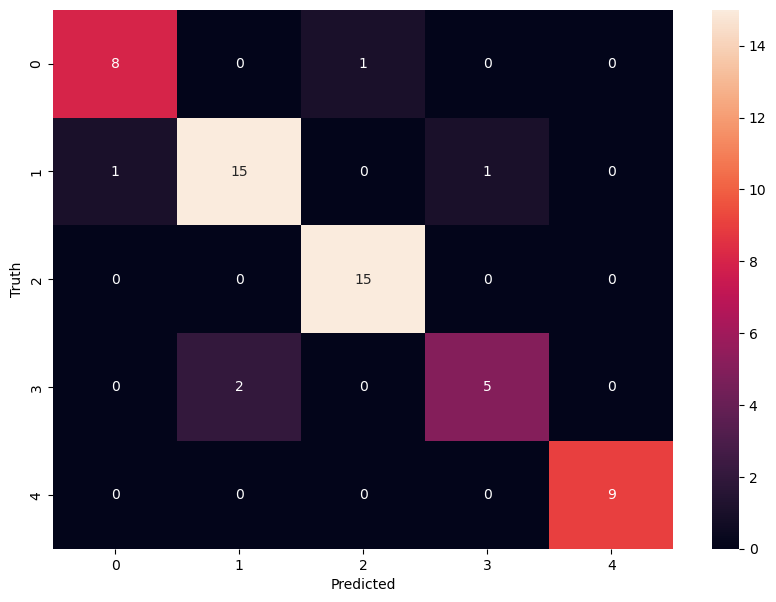

In [160]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [161]:
class_dict

{'Elon_Musk': 0, 'Gal_gadot': 1, 'Mr.beast': 2, 'Ronaldo': 3, 'Virat_kohli': 4}

### Save the trained model

In [162]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

### Save class dictionary

In [163]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))

### End of the Model
